# Telemetria Treino/Teste - Tráfego Original/Replay

In [78]:
import pandas as pd

### TRAIN

# dt_original_http_train = pd.read_csv('/var/luciano/pcaps/train/normal-http/http-normal-train.stats_merged.csv')  
# dt_original_synflood_train = pd.read_csv('/var/luciano/pcaps/train/attack-synflood/attack-synflood-train.stats_merged.csv')  
# dt_original_mixed_train = pd.read_csv('/var/luciano/pcaps/train/mixed/mixed-train.stats_merged.csv')

dt_original_http_train = pd.read_csv('/home/lucianobf/dev/mpca/graficos/pcap_stats/original/train/http-normal-train.stats_merged.csv')  
dt_original_synflood_train = pd.read_csv('/var/luciano/pcaps/train/attack-synflood/attack-synflood-train_merged.pcap.stats.csv')
dt_original_mixed_train = pd.read_csv('/home/lucianobf/dev/mpca/graficos/pcap_stats/original/train/mixed-train.stats_merged.csv')

dt_replay_http_train = pd.read_csv("/home/lucianobf/dev/mpca/graficos/pcap_stats/replay/train/normal-http-train-replay.stats_merged.csv")
dt_replay_synflood_train = pd.read_csv("/home/lucianobf/dev/mpca/graficos/pcap_stats/replay/train/attack-synflood-train-replay_merged.pcap.stats.csv")
dt_replay_mixed_train = pd.read_csv("/home/lucianobf/dev/mpca/graficos/pcap_stats/replay/train/mixed-train-replay.stats_merged.csv")


### TEST

# dt_original_http_test = pd.read_csv('/var/luciano/pcaps/test/normal-http/normal-http-test.stats_merged.csv')  
# dt_original_synflood_test = pd.read_csv('/var/luciano/pcaps/test/attack-synflood/attack-synflood-test.stats_merged.csv')  
# dt_original_mixed_test = pd.read_csv('/var/luciano/pcaps/test/mixed/mixed-test.stats_merged.csv')

dt_original_http_test = pd.read_csv('/home/lucianobf/dev/mpca/graficos/pcap_stats/original/test/normal-http-test.stats_merged.csv')  
dt_original_synflood_test = pd.read_csv('/home/lucianobf/dev/mpca/graficos/pcap_stats/original/test/attack-synflood-test_merged.pcap.stats.csv')
dt_original_mixed_test = pd.read_csv('/home/lucianobf/dev/mpca/graficos/pcap_stats/original/test/mixed-test.stats_merged.csv')

dt_replay_http_test = pd.read_csv("/home/lucianobf/dev/mpca/graficos/pcap_stats/replay/test/normal-http-test-replay.stats_merged.csv")
dt_replay_synflood_test = pd.read_csv("/home/lucianobf/dev/mpca/graficos/pcap_stats/replay/test/attack-synflood-test-replay_merge.pcap.stats.csv")
dt_replay_mixed_test = pd.read_csv("/home/lucianobf/dev/mpca/graficos/pcap_stats/replay/test/mixed-test-replay.stats_merged.csv")


In [79]:
dt_original_http_train

,Datetime,Frames,Bytes
0,2022-07-07 15:30:00,70613,48126686
1,2022-07-07 15:30:05,35469,24469697
2,2022-07-07 15:30:10,41960,29593257
3,2022-07-07 15:30:15,37590,25741798
4,2022-07-07 15:30:20,36420,24876630
...,...,...,...
727,2022-07-07 16:30:35,44036,30906613
728,2022-07-07 16:30:40,54366,38004515
729,2022-07-07 16:30:45,57747,40567142
730,2022-07-07 16:30:50,49796,32711836


In [105]:
diff = pd.DataFrame()
diff['Datetime'] = dt_original_http_train['Datetime']
diff['Frames'] =  dt_original_http_train['Frames'] - dt_replay_http_train['Frames']
diff['Bytes'] =  dt_original_http_train['Bytes'] - dt_replay_http_train['Bytes']
diff['Frames'] = diff['Frames'].abs()
diff['Bytes'] = diff['Bytes'].abs()
diff['Bytes'].max()

137239759.0

In [114]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.cla() # Clear the current axes
plt.clf() # Clear the current figure

def grafico_pcap_traffic(dt_train, dt_test, dt_train_replay, dt_test_replay, title, plot_diff=None):
    diff_train = pd.DataFrame()
    diff_test = pd.DataFrame()
    axtitle = ""

    if (plot_diff):
        diff_train['Datetime'] = dt_train['Datetime']
        diff_train['Frames'] =  dt_train['Frames'] - dt_train_replay['Frames']
        diff_train['Bytes'] =  dt_train['Bytes'] - dt_train_replay['Bytes']
        diff_train['Frames'] = diff_train['Frames'].abs()
        diff_train['Bytes'] = diff_train['Bytes'].abs()

        diff_test['Datetime'] = dt_test['Datetime']
        diff_test['Frames'] =  dt_test['Frames'] - dt_test_replay['Frames']
        diff_test['Bytes'] =  dt_test['Bytes'] - dt_test_replay['Bytes']
        diff_test['Frames'] = diff_test['Frames'].abs()
        diff_test['Bytes'] = diff_test['Bytes'].abs()

    plt.rcParams["mathtext.fontset"] = 'dejavuserif'
    plt.rcParams["axes.titlesize"] = 18
    plt.rcParams["axes.labelsize"] = 16
    plt.rc('font', size=16)
    plt.rc('figure', facecolor='white')

    # making subplots
    fig, ax = plt.subplots(2,2, figsize=(20,10), linewidth=2, edgecolor="black")
    # set data with subplot and plot
    ax[0,0].plot(dt_train['Frames'], color="tab:blue", label='Original Treino')
    ax[0,0].plot(dt_train_replay['Frames'], color="tab:orange", label='Replay Treino')
    if plot_diff: ax[0,0].plot(diff_train['Frames'], color="black", alpha=0.3, label='Diferença')
    ax[0,0].set_ylabel('Pacotes/s' )
    ax[0,0].set_xlabel('Tempo - Amostras a cada 5s')
    #ax[0,0].set_yscale("symlog")
    #ax[0,0].get_yaxis().set_major_formatter(ScalarFormatter())
    ax[0,0].set_facecolor('ghostwhite')
    ax[0,0].grid()
    ax[0,0].legend()
    if plot_diff:
        axtitle = f"Pacotes - Treino \n Max Dif. = {diff_train['Frames'].max()}"
    else:
        axtitle = "Pacotes - Treino"
    ax[0,0].set_title(axtitle, fontweight='bold')

    # set data with subplot and plot
    ax[0,1].plot(dt_test['Frames'], color="tab:blue", label='Original Teste')
    ax[0,1].plot(dt_test_replay['Frames'], color="tab:orange", label='Replay Teste')
    if plot_diff: ax[0,1].plot(diff_test['Frames'], color="black", alpha=0.3, label=f"Diferença")
    ax[0,1].set_ylabel('Pacotes/s')
    ax[0,1].set_xlabel('Tempo - Amostras a cada 5s')
    #ax[0,1].set_yscale("symlog")
    #ax[0,1].get_yaxis().set_major_formatter(ScalarFormatter())
    ax[0,1].set_facecolor('ghostwhite')
    ax[0,1].grid()
    ax[0,1].legend()
    if plot_diff:
        axtitle = f"Pacotes - Teste \n Max Dif. = {diff_test['Frames'].max()}"
    else:
        axtitle = "Pacotes - Teste"
    ax[0,1].set_title(axtitle, fontweight='bold')


    ax[1,0].plot(dt_train['Bytes'], color="tab:blue", label='Original Treino')
    ax[1,0].plot(dt_train_replay['Bytes'], color="tab:orange", label='Replay Treino')
    ax[1,0].set_ylabel('Bytes/s')
    ax[1,0].set_xlabel('Tempo - Amostras a cada 5s')
    #ax[1,1].set_yscale("symlog")
    #ax[1,1].get_yaxis().set_major_formatter(ScalarFormatter())
    ax[1,0].set_facecolor('ghostwhite')
    ax[1,0].grid()
    ax[1,0].legend()
    ax[1,0].set_title("Bytes - Treino", fontweight='bold')
    

    ax[1,1].plot(dt_test['Bytes'], color="tab:blue", label='Original Teste')
    ax[1,1].plot(dt_test_replay['Bytes'], color="tab:orange", label='Replay Teste')
    ax[1,1].set_ylabel('Bytes/s')
    ax[1,1].set_xlabel('Tempo - Amostras a cada 5s')
    #ax[1,1].set_yscale("symlog")
    #ax[1,1].get_yaxis().set_major_formatter(ScalarFormatter())
    ax[1,1].set_facecolor('ghostwhite')
    ax[1,1].grid()
    ax[1,1].legend()
    ax[1,1].set_title("Bytes - Teste", fontweight='bold')

    # set the spacing between subplots
    # plt.subplots_adjust(left=0.1,
    #                      bottom=0.1, 
    #                      right=0.9, 
    #                      top=0.8, 
    #                      wspace=0.4, 
    #                      hspace=0.4)
    plt.tight_layout(pad=2.2)
    plt.suptitle(title, fontsize=18, y=1.0)
    plt.show()


<Figure size 432x288 with 0 Axes>

### HTTP Normal

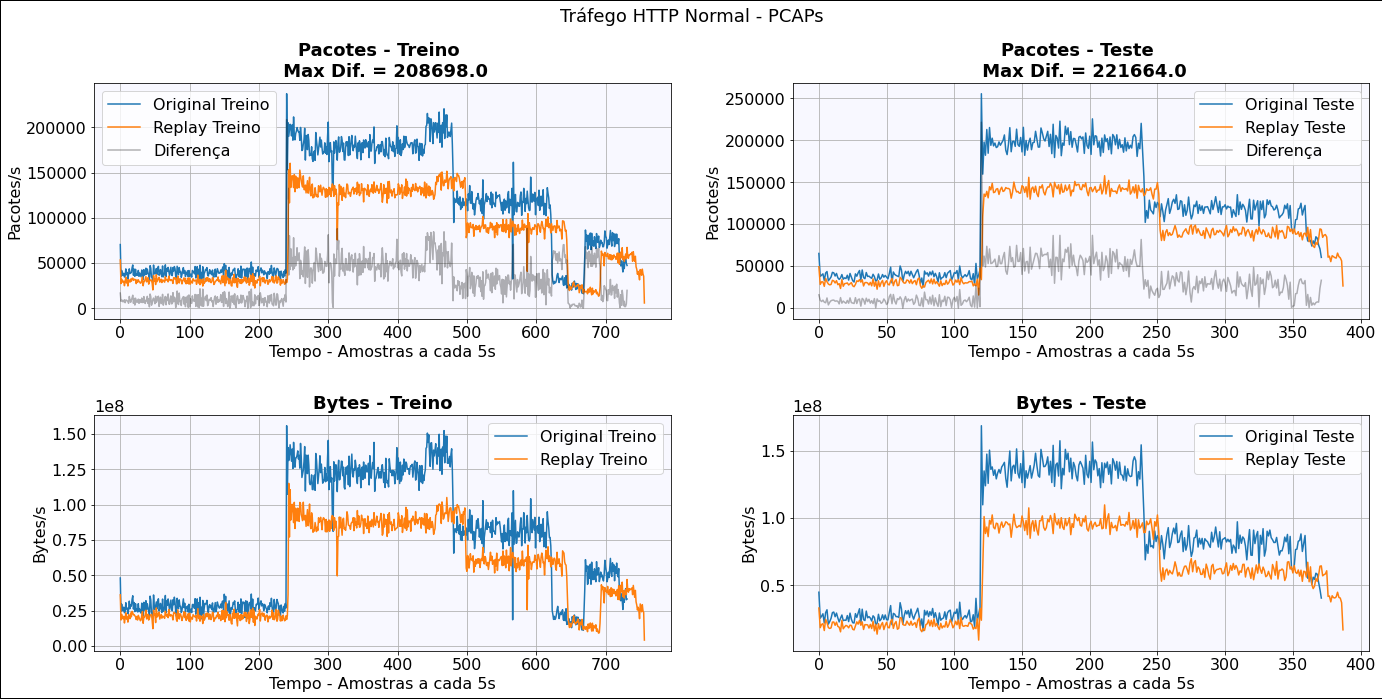

In [115]:
grafico_pcap_traffic(dt_original_http_train, dt_original_http_test, dt_replay_http_train, dt_replay_http_test, "Tráfego HTTP Normal - PCAPs", plot_diff=True)

### Ataque SYN-Flood

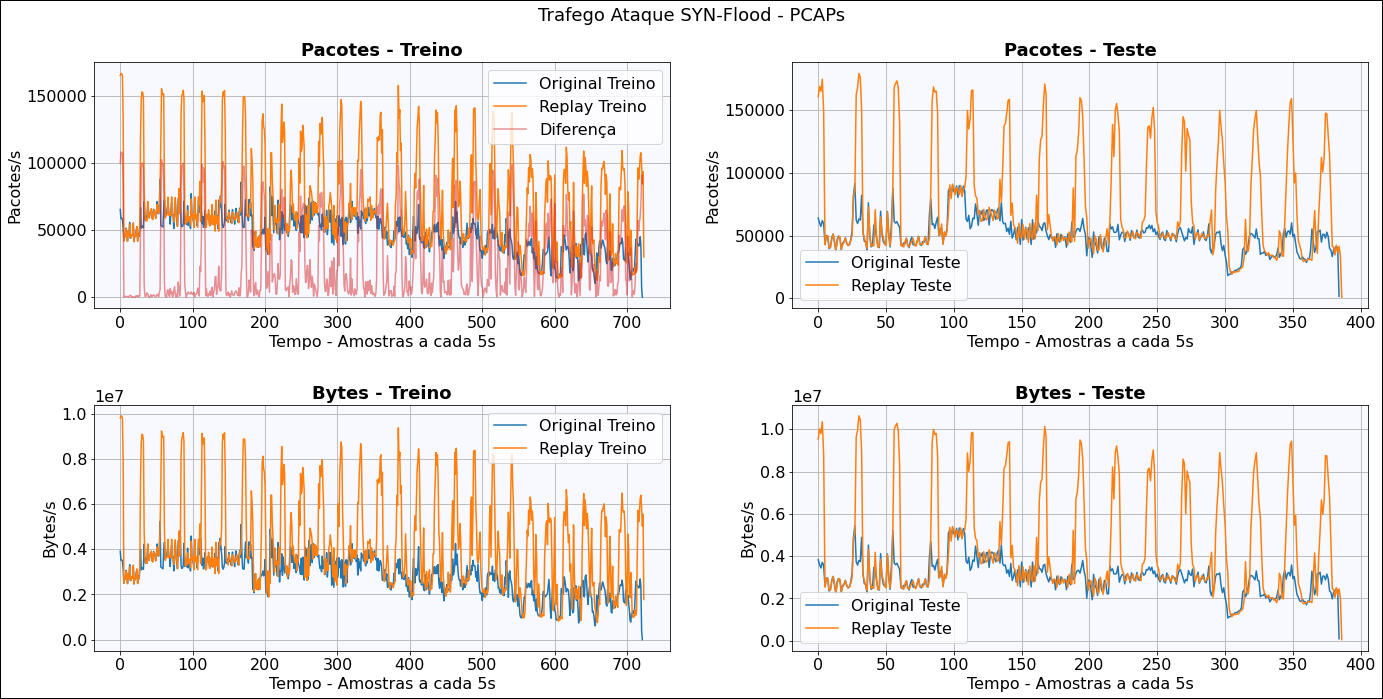

In [ ]:
grafico_pcap_traffic(dt_original_synflood_train, dt_original_synflood_test, dt_replay_synflood_train, dt_replay_synflood_test, "Trafego Ataque SYN-Flood - PCAPs")

### Concorrente - Normal+Ataque

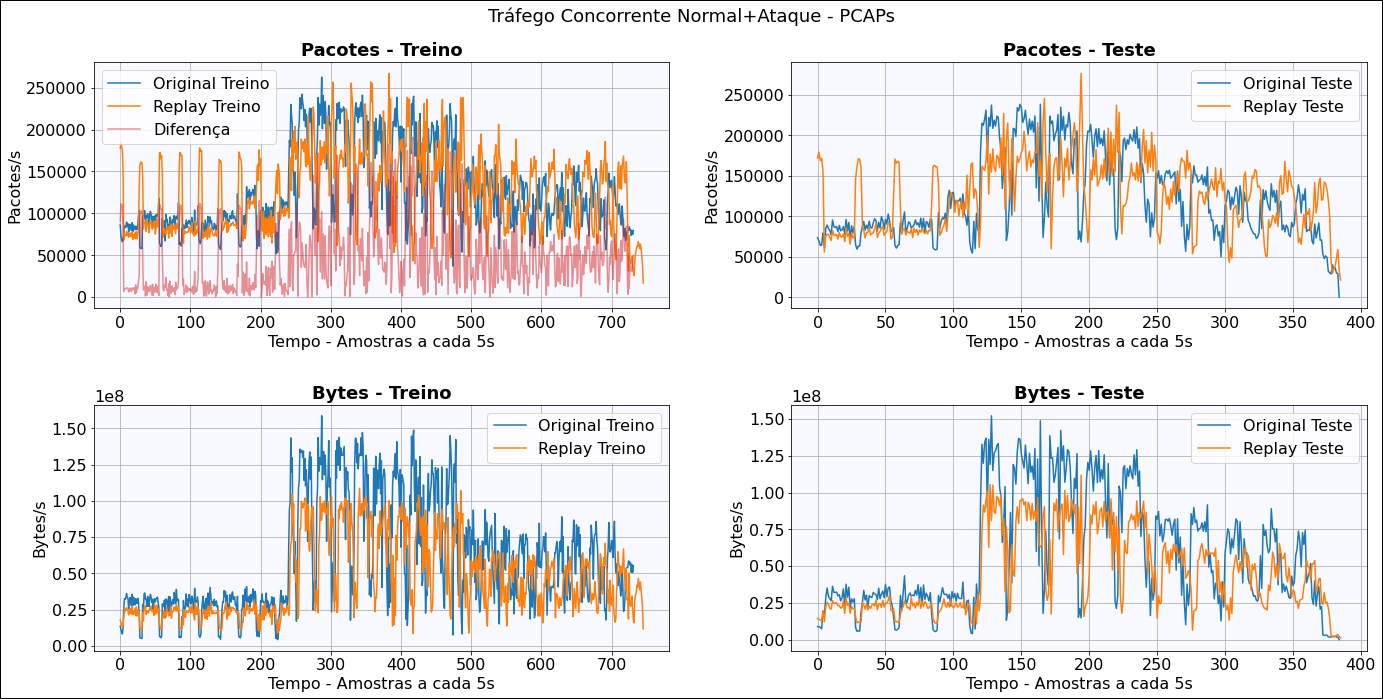

In [ ]:
grafico_pcap_traffic(dt_original_mixed_train, dt_original_mixed_test, dt_replay_mixed_train, dt_replay_mixed_test, "Tráfego Concorrente Normal+Ataque - PCAPs")

### Total
Tráfegos estão em horários diferentes. Gráfico total fica inadequado.